In [56]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import multiprocessing as mp

In [81]:
T = 200
d = 5
K = 50
X = np.random.randn(K, d)  # Finite set of arms
theta_star = np.random.randn(d)

idx_star = np.argmax(X@theta_star)
x_star = X[idx_star]

def worker(X, theta_star, T, sigma, name):
    np.random.seed()
    alg = TopTwoAlgorithm(X, theta_star, T, sigma, name)
    alg.run()
    return alg.best_x

pool = mp.Pool(50)
args = [(X, theta_star, T, 1,i) for i in range(20)]
results = pool.starmap(worker, args)

runrunrunrunrun run runrunrun 5   run run run 17run139  11 816run10run  iter run 18 iteriter   1      31514run61   iter iteriteriteriter  121iterruniter 
iteriter0   run     1  4  1iter 

1
    1iter 19  1
iteriter1 7 
12
1
  
  
1    

iter 11

iter  run 1 1 

0
run



 
run run
run 
run1iter 13     1
 
11
1
5run run   17iter    16
11iter
  
 3iterruniter

  

 12 11
1run  
11 run iter  
 11  
19iter iter

 

 
11 
runrunrun 5run11 run 14runrun    iter iter runiter     1116
1518 iteriter
 1 11 21   iter


  13iter2run
 
 run21run9 

run
 11  11114  7 iter iter     11
 17  11
 run
run10 iter 
  
  iter 

 191111
 

iter6iter
16 
 runiter

iter


 run11   runrun run21run14iter    9118  
 
   
iter

2 iter11runiter 1  
   run31 7 211111iterrun2118 
iteriter 
   
  iter21
run   

 iter   21    21iter3iter  

21


run21  
21 run runrun 
   13
 16runiter112  0run21  iter run  
iter

31  
 run 

 run8
  5run15 

  iter7  iterruniter9iter
441
 
3112 10      iter iter
 
 runiterrun  
iter19 31

[]

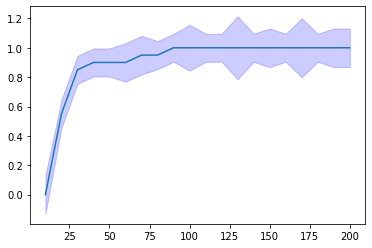

In [85]:
m = (results == idx_star).mean(axis=0)
s = (results == idx_star).std(axis=1)/np.sqrt(20)
plt.plot(10*np.arange(20)+10, m)
plt.fill_between(10*np.arange(20)+10, m - 1.96*s, m + 1.96*s,
                 color='blue', alpha=0.2)
plt.plot()

## Scratch but don't delete

In [1]:
import numpy as np
l =[.1,.2,.3]
X = np.random.randn(3,2)
s = 0
for i in range(3):
    s += l[i]*np.outer(X[i], X[i])
print(s)

print(X.T@np.diag(l)@X)

[[0.21876108 0.21473142]
 [0.21473142 0.30097   ]]
[[0.21876108 0.21473142]
 [0.21473142 0.30097   ]]


In [ ]:
U = [u1, u2, u3]
V = [v1,v2,v3].T
U@v = u1@v1.T + u2@v2.T + u3@v3.T

In [8]:
d = 5
V = np.eye(d)
X = np.random.randn(20,d)


In [11]:
X = X.reshape(20,1,d)
XT = X.reshape(20,d,1)

In [25]:
A = V + np.matmul(XT,X)

In [27]:
x = np.random.randn(d)

In [28]:
x@A@x

array([ 3.13103687,  3.00954796,  5.05600226,  3.79457384,  2.85755611,
        3.110461  ,  8.68935298,  2.73731387,  3.07675707,  5.63451737,
        2.90532333,  5.35543615,  2.90781363,  3.80364324,  2.64713931,
       16.7744548 , 11.24417744,  2.90006682,  4.76877344,  3.99901224])

In [30]:
x@(V+np.outer(X[1],X[1]))@x

3.0095479645977257